# Exercise 2.4 Task

### Research Questions: 
### - What are the most popular stations in the city?
### - Which are the months with the most trips taken? Is there a weather component at play? How does temperature affect ridership numbers?
### - What are the most popular trips between stations?
### - Are the existing stations evenly distributed?
### - How does weekday vs. weekend ridership differ?
### - Are electric bikes more popular than classic bikes? 

## 01. Import Libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt
import seaborn as sns

## 02. Import Data

In [2]:
df = pd.read_csv('newyork_data.csv', index_col = 0)

In [3]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
date                   object
avgTemp               float64
_merge                 object
dtype: object

## 03. Set Theme

In [4]:
sns.set_style("dark")
sns.set_palette('BuPu_r')

## 04. Barch Chart for Top 20 Starting Stations

In [5]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp', '_merge'],
      dtype='object')

In [6]:
# Seaborn bar chart for most popular stations

df['value'] = 1

In [7]:
df_t = df.groupby('start_station_name')['value'].count().reset_index()

In [8]:
df_t

,start_station_name,value
0,11 St & Washington St,15502
1,12 St & Sinatra Dr N,17137
2,14 St Ferry - 14 St & Shipyard Ln,17066
3,4 St & Grand St,10356
4,5 Corners Library,3043
...,...,...
79,Van Vorst Park,10744
80,Warren St,13575
81,Washington St,15101
82,Willow Ave & 12 St,9459


In [9]:
top20 = df_t.nlargest(20, 'value')

In [10]:
top20

,start_station_name,value
37,Grove St PATH,42556
75,South Waterfront Walkway - Sinatra Dr & 1 St,34245
44,Hoboken Terminal - River St & Hudson Pl,33020
43,Hoboken Terminal - Hudson St & Hudson Pl,30244
22,City Hall - Washington St & 1 St,23289
69,Newport Pkwy,21961
38,Hamilton Park,20477
68,Newport PATH,19965
42,Hoboken Ave at Monmouth St,19501
61,Marin Light Rail,19230


In [11]:
# Create a color gradient with 20 colors

colors = sns.color_palette("BuPu_r", n_colors=len(top20))

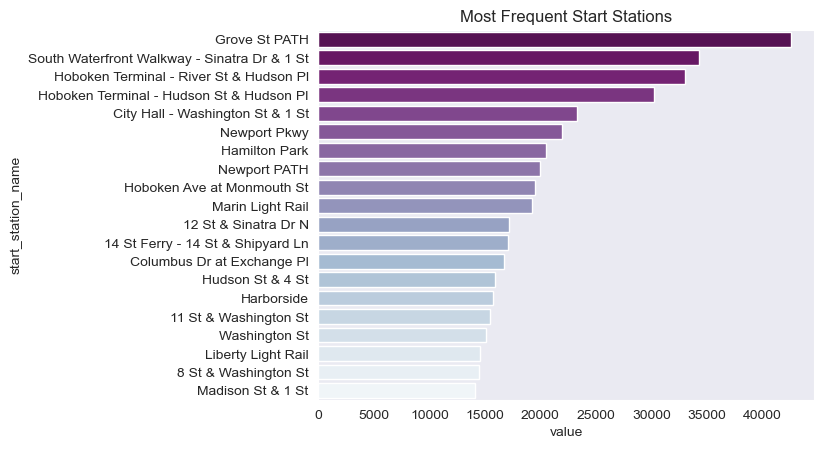

In [12]:
sns.barplot(data = top20, x = 'value', y = 'start_station_name', hue="start_station_name", palette=colors, legend=False)
plt.title("Most Frequent Start Stations")
plt.show()

## 05. Dual-Axis Line Plot Using Seaborn

In [13]:
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')

In [14]:
# Groupby the count of the trips 

df_group = pd.DataFrame(df.groupby(['date'])['ride_id'].count()).reset_index()

In [15]:
df_group.head()

,date,ride_id
0,2022-01-01,592
1,2022-01-02,1248
2,2022-01-03,832
3,2022-01-04,934
4,2022-01-05,914


In [16]:
df_group.rename(columns = {'ride_id':'bike_rides_daily'}, inplace = True)
df = df.merge(df_group, on = "date", how = 'outer', indicator = 'merge_flag')
print(df['merge_flag'].value_counts(dropna = False))
print("Shape of January 1st is", df[df['date'] == '2022-01-01'].shape) # Check 
print("Shape of January 2nd is", df[df['date'] == '2022-01-02'].shape) # Second check 

df_temp = df.set_index('date')

print(df_temp.columns)

merge_flag
both          895485
left_only          0
right_only         0
Name: count, dtype: int64
Shape of January 1st is (592, 19)
Shape of January 2nd is (1248, 19)
Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp', '_merge', 'value', 'bike_rides_daily',
       'merge_flag'],
      dtype='object')


In [17]:
df_temp.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp', '_merge', 'value', 'bike_rides_daily',
       'merge_flag'],
      dtype='object')

In [18]:
df_temp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,_merge,value,bike_rides_daily,merge_flag
date,,,,,,,,,,,,,,,,,,
2022-01-01,115C78C3039FFA89,electric_bike,2022-01-01 09:21:14,2022-01-01 09:35:46,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member,11.6,both,1,592,both
2022-01-01,7FFD810CAA7A919E,classic_bike,2022-01-01 02:43:56,2022-01-01 02:43:57,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,11.6,both,1,592,both
2022-01-01,E715E8432031B72C,classic_bike,2022-01-01 02:13:33,2022-01-01 02:18:42,Essex Light Rail,JC038,Washington St,JC098,40.712774,-74.036486,40.724294,-74.035483,member,11.6,both,1,592,both
2022-01-01,BF1B7B1E1961A87B,electric_bike,2022-01-01 17:18:46,2022-01-01 18:55:25,Grand St,JC102,W 27 St & 7 Ave,6247.06,40.715178,-74.037683,40.746647,-73.993915,casual,11.6,both,1,592,both
2022-01-01,4A01F0E53C6F4386,electric_bike,2022-01-01 11:23:32,2022-01-01 11:29:27,Christ Hospital,JC034,Hoboken Terminal - Hudson St & Hudson Pl,HB101,40.734786,-74.050444,40.735938,-74.030305,member,11.6,both,1,592,both


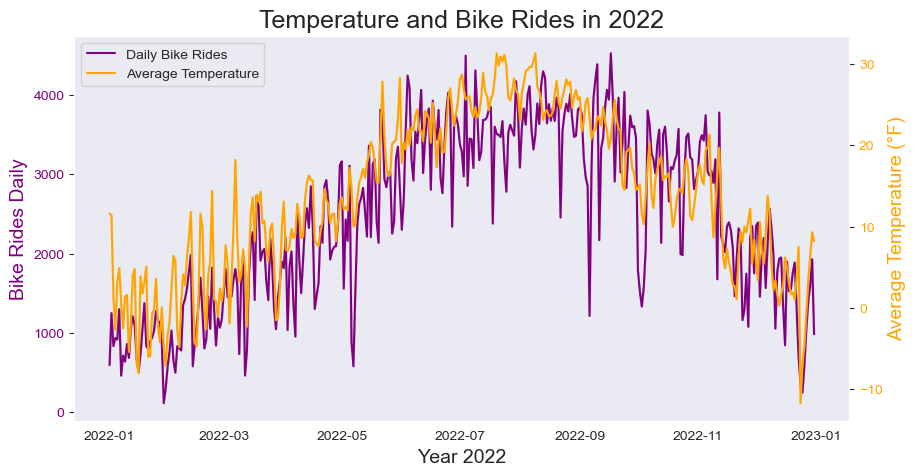

In [19]:
# Create the figure and first axis
fig, ax = plt.subplots(figsize=(10, 5))

# --- Left axis (bike rides) ---
sns.lineplot(
    data=df_temp,
    x=df_temp.index,              
    y="bike_rides_daily",
    color="purple",               
    ax=ax,
    label="Daily Bike Rides",
    legend=False 
)
ax.set_xlabel("Year 2022", fontsize=14)
ax.set_ylabel("Bike Rides Daily", color="purple", fontsize=14)
ax.tick_params(axis="y", labelcolor="purple")

# --- Right axis (temperature) ---
ax2 = ax.twinx()
sns.lineplot(
    data=df_temp,
    x=df_temp.index,
    y="avgTemp",
    color="orange",                
    ax=ax2,
    label="Average Temperature"
)
ax2.set_ylabel("Average Temperature (°F)", color="orange", fontsize=14)
ax2.tick_params(axis="y", labelcolor="orange")

# --- Title and legend ---
plt.title("Temperature and Bike Rides in 2022", fontsize=18)

# --- Combine legends ---
lines_1, labels_1 = ax.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper left")

plt.show()

## 06. Box Plot for Most Popular Ride Type on Daily Rides

In [34]:
df_temp.dtypes

ride_id                 object
rideable_type           object
started_at              object
ended_at                object
start_station_name      object
start_station_id        object
end_station_name        object
end_station_id          object
start_lat              float64
start_lng              float64
end_lat                float64
end_lng                float64
member_casual           object
avgTemp                float64
_merge                  object
value                    int64
bike_rides_daily         int64
merge_flag            category
dtype: object

In [35]:
df_temp['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')

In [36]:
df_temp.dtypes

ride_id                       object
rideable_type                 object
started_at                    object
ended_at                      object
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
avgTemp                      float64
_merge                        object
value                          int64
bike_rides_daily               int64
merge_flag                  category
date                  datetime64[ns]
dtype: object

In [37]:
df_temp['rideable_type']

date
2022-01-01    electric_bike
2022-01-01     classic_bike
2022-01-01     classic_bike
2022-01-01    electric_bike
2022-01-01    electric_bike
                  ...      
2022-12-31    electric_bike
2022-12-31     classic_bike
2022-12-31     classic_bike
2022-12-31     classic_bike
2022-12-31     classic_bike
Name: rideable_type, Length: 895485, dtype: object

In [38]:
df_temp.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp', '_merge', 'value', 'bike_rides_daily',
       'merge_flag', 'date'],
      dtype='object')

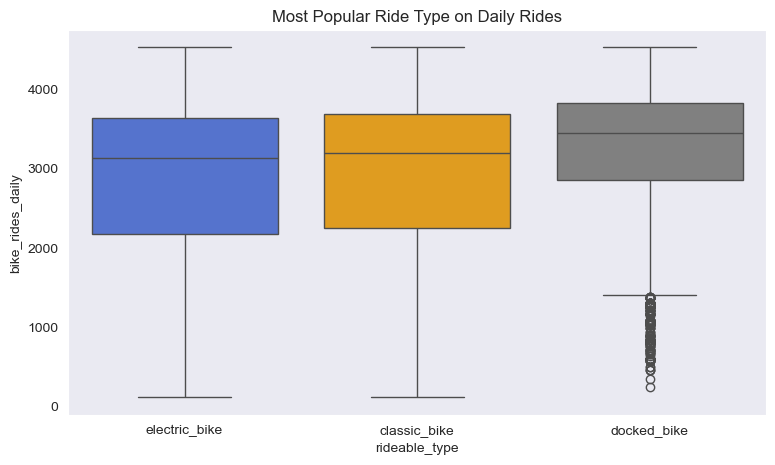

In [39]:
plt.figure(figsize=(9,5))
sns.boxplot(
    x='rideable_type',
    y='bike_rides_daily',
    data=df_temp,
    hue='rideable_type',  
    palette={'electric_bike': 'royalblue', 'classic_bike': 'orange', 'docked_bike': 'gray'},
    legend=False   
)
plt.title("Most Popular Ride Type on Daily Rides")
plt.show()

### Analysis: The box plot shows that electric bikes and classic bikes have a similiar distributions, with comparable box and whisker lengths. Classic bikes are shifted just slightly upward, suggesting greater daily usage overall. Both bike types are left-skewed and have higher median lines, implying that most days have relatively high ride counts, with a few days with lower activity. 
### I didn't really look at docked bikes because those are unused bikes and for this analysis, I wanted to know if one bike type was more popular than the other.
### To Keep In Mind: There may be an equal distribution of electric bikes vs classic bikes at the stations and/or people just take whatever's available when they show up to the station. Another thing to consider (possibly consider - I don't know what type of electric bikes are available and their capabilities) is that when individuals choose an electric bike, they may not utilize the electric bike feature, which means that even though they chose an electric bike, they may be using it as a classic bike.

## 07. FacetGrid

In [40]:
df_temp.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp', '_merge', 'value', 'bike_rides_daily',
       'merge_flag', 'date'],
      dtype='object')

In [43]:
df_temp.dtypes

ride_id                       object
rideable_type                 object
started_at                    object
ended_at                      object
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
avgTemp                      float64
_merge                        object
value                          int64
bike_rides_daily               int64
merge_flag                  category
date                  datetime64[ns]
dtype: object

### Creating New Day Type and Day of Week Columns

In [44]:
df_temp['started_at'].dtypes

dtype('O')

In [45]:
df_temp['started_at_dt'] = pd.to_datetime(df_temp['started_at'], errors='coerce')

In [48]:
df_temp['started_at_dt'].dtypes

dtype('<M8[ns]')

In [49]:
# Creating a new column for Day of Week

df_temp['day_of_week'] = df_temp['started_at_dt'].dt.day_name()

In [50]:
df_temp['day_type'] = df_temp['day_of_week'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

In [53]:
df_temp.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp', '_merge', 'value', 'bike_rides_daily',
       'merge_flag', 'date', 'started_at_dt', 'day_of_week', 'day_type'],
      dtype='object')

In [54]:
df_temp['day_type']

date
2022-01-01    Weekend
2022-01-01    Weekend
2022-01-01    Weekend
2022-01-01    Weekend
2022-01-01    Weekend
               ...   
2022-12-31    Weekend
2022-12-31    Weekend
2022-12-31    Weekend
2022-12-31    Weekend
2022-12-31    Weekend
Name: day_type, Length: 895485, dtype: object

In [55]:
df_temp['day_of_week']

date
2022-01-01    Saturday
2022-01-01    Saturday
2022-01-01    Saturday
2022-01-01    Saturday
2022-01-01    Saturday
                ...   
2022-12-31    Saturday
2022-12-31    Saturday
2022-12-31    Saturday
2022-12-31    Saturday
2022-12-31    Saturday
Name: day_of_week, Length: 895485, dtype: object

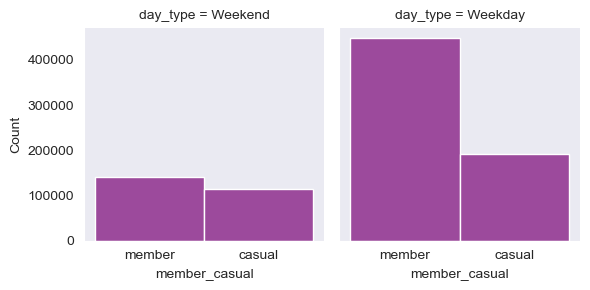

In [57]:
# FacetGrid

grid = sns.FacetGrid(df_temp, col = "day_type")
grid.map(sns.histplot, "member_casual", bins = 15)
plt.show()

### Analysis: 
### This comparison wasn't too surprising, however I was surprised that casual rides (individuals who don't have a membership) wouldn't be higher on Weekends. I expected member rides to be higher during the weekday as I'm assuming one reason they have a membership is for commuting to work or commuting to extracurriculars. I thought casual rides would be higher on the weekends for riding around the city in a more economical fashion. I was also surprised to see that casual rides were higher during the weekday. That could be due to last minute commute/extracurricular ride choice or even tourists visiting during the week. 
### As an analyst, I would recommend having some kind of special pricing for weekends to try to boost those numbers, or trying to figure out what specifically drives more weekday rides vs weekend rides and also taking a look at duration for the different types of rides. 